In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [19]:
GridSize = 8
Goal = (7, 7)
Traps = [(0, 4), (2, 2), (4, 1), (5, 3), (6, 6)]
ActionsList = ['UP', 'DOWN', 'LEFT', 'RIGHT']

In [20]:
Q = np.zeros((GridSize, GridSize, 4))

Alpha = 0.5
Gamma = 0.9
Epsilon = 0.2
Episodes = 80
Delay = 0.2


Episode 1
Step 1: State (0, 0), Action LEFT, Reward -1, Next (0, 0), Mode Exploring, Q 0.00 → -0.50
Step 2: State (0, 0), Action UP, Reward -1, Next (0, 0), Mode Exploring, Q 0.00 → -0.50
Step 3: State (0, 0), Action UP, Reward -1, Next (0, 0), Mode Exploiting, Q -0.50 → -0.75
Step 4: State (0, 0), Action RIGHT, Reward -1, Next (0, 1), Mode Exploring, Q 0.00 → -0.50
Step 5: State (0, 1), Action RIGHT, Reward -1, Next (0, 2), Mode Exploring, Q 0.00 → -0.50
Step 6: State (0, 2), Action DOWN, Reward -1, Next (1, 2), Mode Exploring, Q 0.00 → -0.50
Step 7: State (1, 2), Action RIGHT, Reward -1, Next (1, 3), Mode Exploring, Q 0.00 → -0.50
Step 8: State (1, 3), Action DOWN, Reward -1, Next (2, 3), Mode Exploring, Q 0.00 → -0.50
Step 9: State (2, 3), Action RIGHT, Reward -1, Next (2, 4), Mode Exploring, Q 0.00 → -0.50
Step 10: State (2, 4), Action RIGHT, Reward -1, Next (2, 5), Mode Exploring, Q 0.00 → -0.50
Step 11: State (2, 5), Action UP, Reward -1, Next (1, 5), Mode Exploring, Q 0.00 → -0

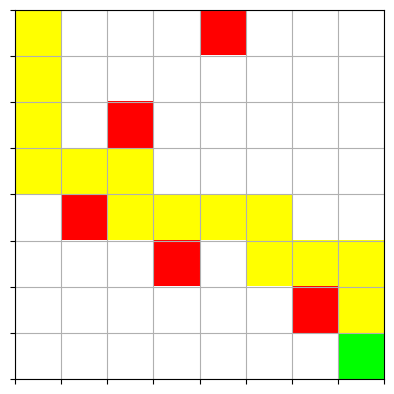

In [21]:

def step(state, action):
    x, y = state

    if action == 0 and x > 0:
        x -= 1
    elif action == 1 and x < GridSize - 1:
        x += 1
    elif action == 2 and y > 0:
        y -= 1
    elif action == 3 and y < GridSize - 1:
        y += 1

    next_state = (x, y)

    if next_state == Goal:
        reward = 100
    elif next_state in Traps:
        reward = -10
    else:
        reward = -1

    return next_state, reward


plt.ion()
fig, ax = plt.subplots()

def draw_grid(state=None, path=None, final=False):
    grid = np.ones((GridSize, GridSize, 3))

    for i in range(GridSize):
        for j in range(GridSize):
            if (i, j) == Goal:
                grid[i, j] = [0, 1, 0]
            elif (i, j) in Traps:
                grid[i, j] = [1, 0, 0]
            elif path and (i, j) in path:
                grid[i, j] = [1, 1, 0]
            elif state is not None and (i, j) == state:
                grid[i, j] = [0, 0, 1]

    ax.clear()
    ax.imshow(grid)
    ax.set_xticks(np.arange(-0.5, GridSize, 1))
    ax.set_yticks(np.arange(-0.5, GridSize, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    fig.canvas.draw()
    fig.canvas.flush_events()

    if not final:
        time.sleep(Delay)


def choose_action(state):
    if random.random() < Epsilon:
        return random.randint(0, 3), "Exploring"
    else:
        if np.all(Q[state[0], state[1]] == 0):
            return random.randint(0, 3), "Exploring"
        else:
            return np.argmax(Q[state[0], state[1]]), "Exploiting"


for ep in range(Episodes): # SARSA training
    print(f"\nEpisode {ep + 1}")
    state = (0, 0)
    action, mode = choose_action(state)
    step_count = 0

    while state != Goal and state not in Traps:
        step_count += 1

        next_state, reward = step(state, action)
        next_action, next_mode = choose_action(next_state)

        old_q = Q[state[0], state[1], action]

        Q[state[0], state[1], action] += Alpha * (
            reward + Gamma * Q[next_state[0], next_state[1], next_action]
            - Q[state[0], state[1], action]
        )

        draw_grid(next_state)

        print(
            f"Step {step_count}: State {state}, Action {ActionsList[action]}, "
            f"Reward {reward}, Next {next_state}, Mode {mode}, "
            f"Q {old_q:.2f} → {Q[state[0], state[1], action]:.2f}"
        )

        state = next_state
        action = next_action
        mode = next_mode


state = (0, 0) # Printing Learned Path, optimal one 
optimal_path = [state]

while state != Goal:
    action = np.argmax(Q[state[0], state[1]])

    if action == 0 and state[0] > 0:
        state = (state[0] - 1, state[1])
    elif action == 1 and state[0] < GridSize - 1:
        state = (state[0] + 1, state[1])
    elif action == 2 and state[1] > 0:
        state = (state[0], state[1] - 1)
    elif action == 3 and state[1] < GridSize - 1:
        state = (state[0], state[1] + 1)

    if state in optimal_path:
        break

    optimal_path.append(state)


draw_grid(state=None, path=optimal_path, final=True)
plt.ioff()
plt.show()
